# Prerequisites

## Prepare environment

These commands will install all required dependencies and download dataset.

In [1]:
!rm -f ./products.csv

# cope information about required programming libraries for Python
!gsutil cp gs://dct-tt-6-receng-wrkshp/code/requirements.txt requirements.txt 

# copy data from cloud to the environment of the notebook
!gsutil cp gs://dct-tt-6-receng-wrkshp/dataset/big_basket/products.zip products.zip

# unpack the dataset
!unzip -j ./products.zip

# install Python librraies for this exercise
!pip install -r requirements.txt

Copying gs://dct-tt-6-receng-wrkshp/code/requirements.txt...
- [1 files][   57.0 B/   57.0 B]                                                
Operation completed over 1 objects/57.0 B.                                       
Copying gs://dct-tt-6-receng-wrkshp/dataset/big_basket/products.zip...
- [1 files][  5.7 MiB/  5.7 MiB]                                                
Operation completed over 1 objects/5.7 MiB.                                      
Archive:  ./products.zip
  inflating: products.csv            
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# import libraries to the programing environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading data
Load data to panda data frame.

In [3]:
df = pd.read_csv('products.csv')
rows1, cols1 = df.shape
print(f"""The loaded dataset has:
\t- {rows1} rows
\t- {cols1} columns""")

The loaded dataset has:
	- 27555 rows
	- 10 columns


How data looks like.

Columns:
* **index** - Simply the Index
* **product** - Title of the product (as they're listed)
* **category** - Category into which product has been classified
* **sub_category** - Subcategory into which product has been kept
* **brand** - Brand of the product
* **sale_price** - Price at which product is being sold on the site
* **market_price** - Market price of the product
* **type** - Type into which product falls
* **rating** - Rating the product has got from its consumers
* **description** - Description of the dataset (in detail)

In [4]:
df["product_id"] = df["index"]
df = df.set_index("product_id")
df.drop("index", axis=1, inplace=True)

In [5]:
df.head(10)

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
product_id,,,,,,,,,
1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
6,Germ - Removal Multipurpose Wipes,Cleaning & Household,All Purpose Cleaners,Nature Protect,169.0,199.0,Disinfectant Spray & Cleaners,3.3,Stay protected from contamination with Multipu...
7,Multani Mati,Beauty & Hygiene,Skin Care,Satinance,58.0,58.0,Face Care,3.6,Satinance multani matti is an excellent skin t...
8,Hand Sanitizer - 70% Alcohol Base,Beauty & Hygiene,Bath & Hand Wash,Bionova,250.0,250.0,Hand Wash & Sanitizers,4.0,70%Alcohol based is gentle of hand leaves skin...
9,Biotin & Collagen Volumizing Hair Shampoo + Bi...,Beauty & Hygiene,Hair Care,StBotanica,1098.0,1098.0,Shampoo & Conditioner,3.5,"An exclusive blend with Vitamin B7 Biotin, Hyd..."


# Find similarities in data


## Handling missing values

In our exercise we can just drop all empty values.

In [6]:
print("There are empty values in dataset:")
empty_stats = df.isnull().sum()
empty_columns = [(key, empty_stats[key]) for key in empty_stats.keys() if empty_stats[key] > 0]
for col in empty_columns:
  print(f"\t- column '{col[0]}' has {col[1]} empty values")

There are empty values in dataset:
	- column 'product' has 1 empty values
	- column 'brand' has 1 empty values
	- column 'rating' has 8626 empty values
	- column 'description' has 115 empty values


Dropping empty values.

In [7]:
df = df.dropna()
rows2, cols2 = df.shape
print(f"""The cleared dataset has:
\t- {rows2} rows, {rows1-rows2} rows less
\t- {cols2} columns""")

The cleared dataset has:
	- 18840 rows, 8715 rows less
	- 9 columns


## Handling outliers

In order to do this we need to understand data distributions. We will test product characteristics:
* category
* sub_category
* brand
* type
* rating

In [8]:
def show_hist(col_name):
  # calculate number of unique values
  counts = df[col_name].value_counts()
  # normilize number of unique values (percentage)
  counts_norm = df[col_name].value_counts(normalize=True)
  distr_df = pd.DataFrame({"counts": counts, "counts_norm": counts_norm}).sort_values("counts", ascending=False)
  # show a graph chart
  distr_df.plot(kind='bar', xticks=[], y="counts")

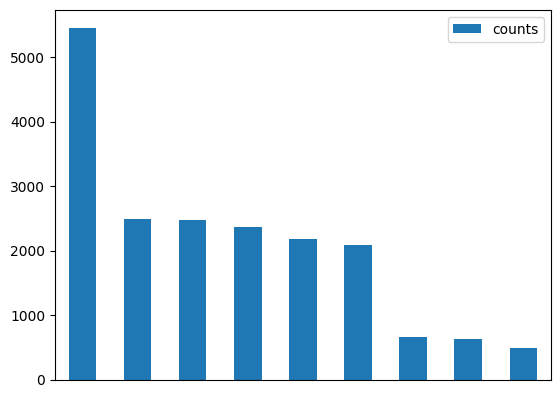

In [9]:
show_hist("category")

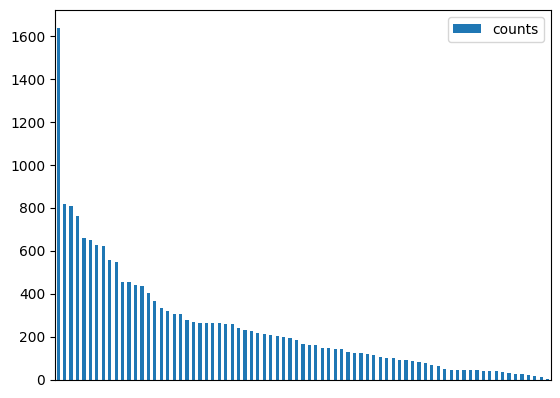

In [10]:
show_hist("sub_category")

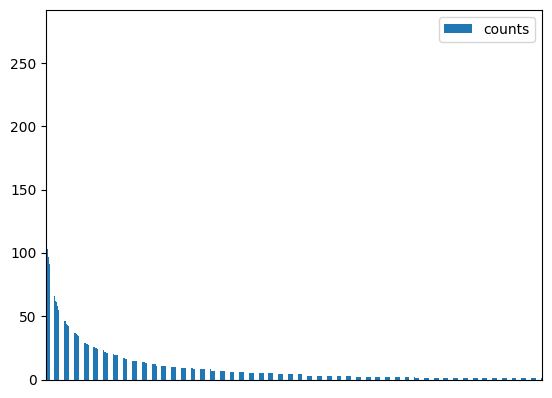

In [11]:
show_hist("brand")

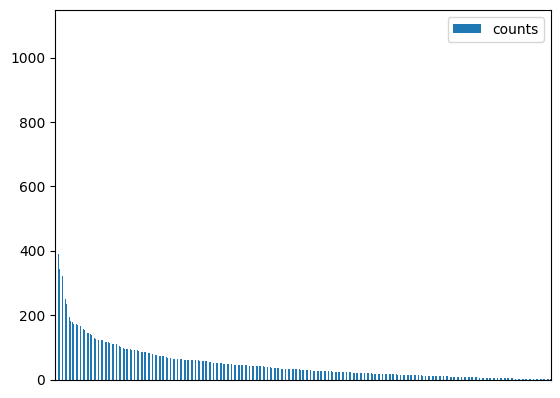

In [12]:
show_hist("type")

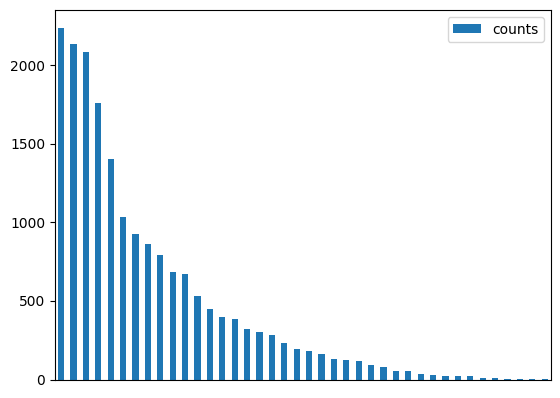

In [13]:
show_hist("rating")

### Normalization

MinMax normalization

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['sale_price_norm', 'market_price_norm']] = scaler.fit_transform(df[['sale_price', 'market_price']])

## Converting categorical variables to numerical

All product characteristics presented as literal values will be converted to numerical.

In [15]:
df_original = df.copy()

### Discretization

We will replace literal values with numbers. Two columns can be converted to numeric with this method: "category" and "brand".

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["category_numeric"] = le.fit_transform(df['category'])
df["brand_numeric"] = le.fit_transform(df['brand'])

Result of the operation:

In [17]:
pd.DataFrame(df[["category", "category_numeric"]].value_counts()).sort_values("category_numeric", axis=0).head(5)

,,0
category,category_numeric,
Baby Care,0,495
"Bakery, Cakes & Dairy",1,665
Beauty & Hygiene,2,5460
Beverages,3,630
Cleaning & Household,4,2091


In [18]:
pd.DataFrame(df[["brand", "brand_numeric"]].value_counts()).sort_values("brand_numeric", axis=0).head(5)

,,0
brand,brand_numeric,
&Me,0,3
&Stirred,1,5
109°F,2,1
137 Degree,3,1
18 Herbs,4,22


### Encode categorical values

There are other columns which needs additional transformation before convertion to numeric. These columns are "sub_category" and "type".

In [19]:
from sklearn.preprocessing import OneHotEncoder

def encode_column(df, col_name):
  ohe = OneHotEncoder()
  df_encoded = ohe.fit_transform(df[[col_name]]).toarray()
  df_encoded = pd.DataFrame(df_encoded, columns=ohe.get_feature_names_out([col_name]))
  df = pd.merge(df.reset_index(), df_encoded, left_index=True, right_index=True, how='inner')
  df = df.set_index("product_id")
  return df

In [20]:
df = encode_column(df, "category_numeric")
df = encode_column(df, "brand_numeric")

Non trivial cases with sub categories and other types with complex names.

In [21]:
df[df['sub_category'].str.contains('care', case=False, na=False)]['sub_category'].unique()

array(['Hair Care', 'Skin Care', 'Oral Care', 'Car & Shoe Care'],
      dtype=object)

In [22]:
df[df['type'].str.contains('care', case=False, na=False)]['type'].unique()

array(['Face Care', 'Lip Care', 'Shaving Care', 'Body Care',
       'Intimate Wash & Care', 'Eye Care', 'Hair Care & Styling',
       'Baby Oral Care', 'Moustache & Beard Care',
       'Maternity Personal Care'], dtype=object)

We will extract additional features from existing ones to have more characteristics to calculate product similarity.

In [23]:
df["subcat_men"] = df['sub_category'].str.contains('men', case=False, na=False).astype(int)

In [24]:
df[["sub_category", "subcat_men"]][df["subcat_men"]==1].head()

,sub_category,subcat_men
product_id,,
39,Men's Grooming,1
47,Men's Grooming,1
53,Men's Grooming,1
293,Men's Grooming,1
305,Men's Grooming,1


In [25]:
df[["sub_category", "subcat_men"]][df["subcat_men"]==0].head()

,sub_category,subcat_men
product_id,,
1,Hair Care,0
2,Storage & Accessories,0
3,Pooja Needs,0
4,Bins & Bathroom Ware,0
5,Bath & Hand Wash,0


Extracting featires from sub category.

In [26]:
subcat_groups = ["men", "women", "care", "hair", "skin", "oral"]
for group in subcat_groups:
  df[f"subcat_{group}"] = df['sub_category'].str.contains(group, case=False, na=False).astype(int)

Extracting featires from type.

In [27]:
type_groups = ["body", "hair", "face", "men", "women", "care", "health", "supplements", "shampoo"]
for group in type_groups:
  df[f"type_{group}"] = df['type'].str.contains(group, case=False, na=False).astype(int)

In [28]:
food_words = ["food", "chocolate", "fruit", "snack", "vegetable", "sugar", "noodle", "baguette", "tea", "popcorn", "drink", "seed", "spice", "meal", "milk", "lunch", "cookie", "sauce"]
df["type_food"] = df['type'].str.contains('|'.join(food_words), case=False, na=False).astype(int)

All additinal columns could be seen in the information about data frame structure.

In [29]:
df.dtypes

product              object
category             object
sub_category         object
brand                object
sale_price          float64
                     ...   
type_care             int64
type_health           int64
type_supplements      int64
type_shampoo          int64
type_food             int64
Length: 1971, dtype: object

## Building recommender model

### Using distance metrics

Before calculation we need to adjust data frame structure ot get unique product identifies and be able to search for exact product later.

In [30]:
# try to find similar product manully
cols = ["product", "sub_category", "type", "sale_price", "sale_price_norm"] + [col for col in df.columns if "type_" in col or "subcat_" in col or "category_" in col or "brand_" in col]
df[df["subcat_care"]==1][cols]

,product,sub_category,type,sale_price,sale_price_norm,category_numeric,brand_numeric,category_numeric_0,category_numeric_1,category_numeric_2,...,type_body,type_hair,type_face,type_men,type_women,type_care,type_health,type_supplements,type_shampoo,type_food
product_id,,,,,,,,,,,,,,,,,,,,,
1,Garlic Oil - Vegetarian Capsule 500 mg,Hair Care,Hair Oil & Serum,220.00,0.032597,2,1648,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,0
7,Multani Mati,Skin Care,Face Care,58.00,0.008262,2,1536,0.0,0.0,1.0,...,0,0,1,0,0,1,0,0,0,0
9,Biotin & Collagen Volumizing Hair Shampoo + Bi...,Hair Care,Shampoo & Conditioner,1098.00,0.164489,2,1655,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
13,"Face Wash - Oil Control, Active",Skin Care,Face Care,110.00,0.016073,2,1292,0.0,0.0,1.0,...,0,0,1,0,0,1,0,0,0,0
17,Smooth Skin Oil - For Dry Skin,Skin Care,Aromatherapy,324.00,0.048220,2,114,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27528,"MaxFresh Toothpaste Gel - Anticavity, Spicy Fr...",Oral Care,Toothpaste,115.00,0.016824,2,368,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
27534,Herbal Lemon Facial Massage Cream,Skin Care,Body Care,191.25,0.028279,2,1261,0.0,0.0,1.0,...,1,0,0,0,0,1,0,0,0,0
27542,Herbal Rose & Apricot Walnut Facial Scrub,Skin Care,Face Care,250.00,0.037104,2,886,0.0,0.0,1.0,...,0,0,1,0,0,1,0,0,0,0


In [31]:
cols = ["sale_price_norm", "market_price_norm"] + [col for col in df.columns if "type_" in col or "subcat_" in col or "category_" in col or "brand_" in col]
product_features = df[cols]
product_features = product_features.drop(["brand_numeric", "category_numeric"], axis=1)

#### Cosine distance

In [32]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(product_features)

# Convert cosine similarity matrix to data frame
cosine_sim_df = pd.DataFrame(cosine_sim, index=df.index, columns=df.index)

In [33]:
def recommend_products(number, product_id=None):
  cols = ["product", "category", "sub_category", "brand", "sale_price", "market_price", "type", "rating", "description"]
  if product_id:
    ser = cosine_sim_df[cosine_sim_df.index==product_id].squeeze()
    s_sorted = ser.sort_values(ascending=False)
    min_field_names = s_sorted.nlargest(number+1).index.tolist()
    return df[df.index.isin(min_field_names)][cols]
  # if product is not specified, we will use the top rated products
  return df.sort_values(by=["rating", "sale_price_norm"], ascending=False).head(number)[cols]

In [34]:
recommend_products(5, 7)

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
product_id,,,,,,,,,
7,Multani Mati,Beauty & Hygiene,Skin Care,Satinance,58.0,58.0,Face Care,3.6,Satinance multani matti is an excellent skin t...
2325,Aloe Vera Gel Vit A & E,Beauty & Hygiene,Skin Care,Satinance,130.0,130.0,Face Care,3.8,It easily penetrates skin without clogging the...
18424,Natural Clay Pack - Orange Peel & Geranium,Beauty & Hygiene,Skin Care,Satinance,115.0,115.0,Face Care,3.0,Satinance Natural Clay Pack is ideal for all s...
20884,Wild Turmeric Powder - Kasthuri Manjal,Beauty & Hygiene,Skin Care,Satinance,40.0,40.0,Face Care,4.2,Radiance & Glowing It helps in removing facial...
21473,"Natural Clay Pack - Neem, Aloe Vera & Tea Tree",Beauty & Hygiene,Skin Care,Satinance,115.0,115.0,Face Care,2.8,"Satinance Neem, Aloe and Tea Tree Clay Pack is..."
25234,"Natural Clay Pack - Wild Turmeric, Saffron & V...",Beauty & Hygiene,Skin Care,Satinance,150.0,150.0,Face Care,2.0,Satinance Natural Clay Pack is ideal for all s...


In [35]:
recommend_products(5, 39)

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
product_id,,,,,,,,,
39,"Sport Deo Spray - Fresh, for Men",Beauty & Hygiene,Men's Grooming,Engage,112.75,205.0,Men's Deodorants,3.7,A refreshing fresh fragrance with sparkling ci...
5425,M4 Perfume Spray - for Men,Beauty & Hygiene,Men's Grooming,Engage,147.00,210.0,Men's Deodorants,3.9,Engage Perfume Sprays created by International...
5971,M2 Perfume Spray - for Men,Beauty & Hygiene,Men's Grooming,Engage,136.50,210.0,Men's Deodorants,4.3,Engage Perfume Sprays created by International...
7417,Bodylicious Deodorant Spray - Mate (For Men),Beauty & Hygiene,Men's Grooming,Engage,136.50,195.0,Men's Deodorants,3.9,Engage Mate enjoy a collection of fragrances t...
11928,M3 Perfume Spray - for Men,Beauty & Hygiene,Men's Grooming,Engage,147.00,210.0,Men's Deodorants,4.4,Engage Perfume Sprays created by International...
26184,Bodylicious Deodorant Spray - Mate (For Men),Beauty & Hygiene,Men's Grooming,Engage,136.50,195.0,Men's Deodorants,4.1,"Engage Man Mate Deo Spray For Beauty tips, tr..."


In [36]:
df[df["type_men"]==1].head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,description,sale_price_norm,...,type_body,type_hair,type_face,type_men,type_women,type_care,type_health,type_supplements,type_shampoo,type_food
product_id,,,,,,,,,,,,,,,,,,,,,
33,Amber - Deodorant Body Spray,Beauty & Hygiene,Fragrances & Deos,Old Spice,211.65,249.0,Men's Deodorants,3.4,Smellcome to Magic with Old Spice’s New Launch...,0.031343,...,0,0,0,1,0,0,0,0,0,0
38,Bodylicious Deodorant Spray - Mate (For Men),Beauty & Hygiene,Fragrances & Deos,Engage,136.50,195.0,Men's Deodorants,4.1,"Engage Man Mate Deo Spray For Beauty tips, tr...",0.020054,...,0,0,0,1,0,0,0,0,0,0
39,"Sport Deo Spray - Fresh, for Men",Beauty & Hygiene,Men's Grooming,Engage,112.75,205.0,Men's Deodorants,3.7,A refreshing fresh fragrance with sparkling ci...,0.016486,...,0,0,0,1,0,0,0,0,0,0
58,Argan-Liquid Gold Hair Spa,Beauty & Hygiene,Hair Care,Aroma Treasures,199.50,210.0,Hair & Scalp Treatment,4.4,Our beautifully crafted Hair Spa Collection pr...,0.029518,...,0,1,0,1,0,0,0,0,0,0
96,Oceans Deodorant for Men - Long Lasting & Fres...,Beauty & Hygiene,Fragrances & Deos,Brut,179.40,299.0,Men's Deodorants,4.0,Looking for an energetic fragrance that works ...,0.026498,...,0,0,0,1,0,0,0,0,0,0


Store data to GCS bucket to use it in API

In [37]:
cosine_sim_df.columns = cosine_sim_df.columns.astype(str)
cosine_sim_df.to_parquet("product_distances.parquet.gzip", compression='gzip')

In [38]:
df = pd.read_parquet('product_distances.parquet.gzip')

In [39]:
df.head()

product_id,1,2,3,4,5,6,7,8,9,10,...,27546,27547,27548,27549,27550,27551,27552,27553,27554,27555
product_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.000496,0.000489,0.000443,0.316531,0.000503,0.365163,0.316662,0.598900,0.000048,...,0.000721,0.000349,0.000098,0.600161,0.000163,0.316623,0.000190,0.000552,0.000999,0.224034
2,0.000496,1.000000,0.000631,0.000571,0.000574,0.000648,0.000115,0.000892,0.002490,0.000061,...,0.000930,0.000450,0.000126,0.001132,0.000210,0.000789,0.000245,0.000712,0.001288,0.000741
3,0.000489,0.000631,1.000000,0.500276,0.000567,0.500317,0.000113,0.000880,0.002457,0.499882,...,0.500476,0.000448,0.000125,0.001117,0.000207,0.000811,0.000247,0.000702,0.001324,0.000813
4,0.000443,0.000571,0.500276,1.000000,0.000513,0.500289,0.000102,0.000797,0.002224,0.499925,...,0.500354,0.000403,0.000113,0.001011,0.000187,0.000712,0.000220,0.000636,0.001162,0.000679
5,0.316531,0.000574,0.000567,0.000513,1.000000,0.000582,0.288701,0.500361,0.316846,0.000055,...,0.000836,0.000404,0.000114,0.316846,0.000188,0.500333,0.000220,0.000639,0.001158,0.353962
